In [5]:
# imports
exec(open('../packages/pyutils.py').read())

In [26]:
imageurl = 'https://images.trvl-media.com/media/content/shared/images/travelguides/destination/6054458/Hanoi-Flag-Tower-95390.jpg'
exportPresentation('./tower_of_hanoi.ipynb', title='Tower of Hanoi', backgroundImage=imageurl, gitlabPush=True, backgroundImageOpacity=.7)

[master 782dee3] update
 4 files changed, 429 insertions(+), 1 deletion(-)
 create mode 100644 public/posts/tower_of_hanoi.html
 create mode 100644 public/posts/tower_of_hanoi_webResources/op.webm
 create mode 100644 public/posts/tower_of_hanoi_webResources/segmented.webmTo gitlab.com:immanuelsamuel/blog.git
   7d5eec7..782dee3  master -> master


# Tower of Hanoi Task

One of the more interesting / complex tasks employed in behavoral neuroscience to study complex planning is the Tower of Hanoi (or Tower of London).  The goal of the task is to move the disks from one peg to another given a few constraits. Only a smaller can be placed on a larger peg and participants are encouraged to perform the task as fast and as accurately as possible (however there seems to be some differences in the literature).

The following video shows the most optimal solution to this task with three disks and three pegs. (As one might expect there are more difficult variations of the same task with more disks and pegs).

<video style='text-align: center' src='./tower_of_hanoi_webResources/op.webm' controls></video>

However unlike classic tasks that require button response, this task requires a series of movements which are very hard to quantify. In this task we opted to use some video processing to segment the disks and then generate the behavioral triggers. This automation provides better accuracy of the performance measures and can be modified to provide advanced performance measures.

In [115]:
# local imports
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

The following shows how the blue and green disks are segmented separately. 

In [84]:
cap = cv2.VideoCapture('data/MVI_5901.AVI')
cap.set(2,0)

for i in range(7):
    ret, frame = cap.read()

frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

frame_hsa = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

frame_hue = frame_hsa[:,:,0]
frame_sat = frame_hsa[:,:,1]

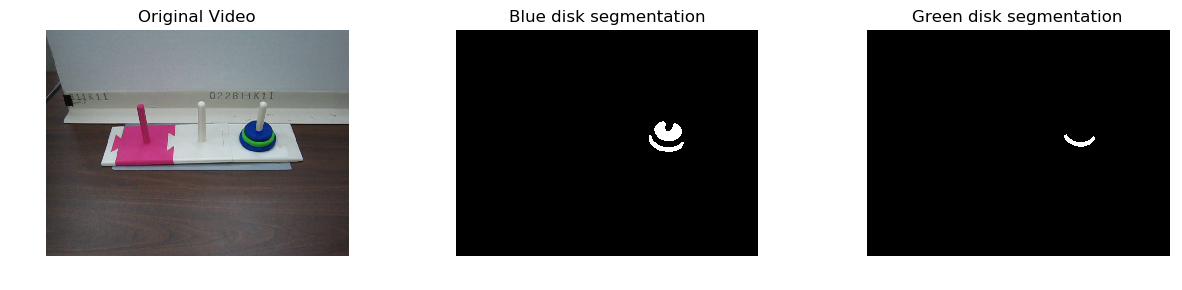

In [85]:
cap = cv2.VideoCapture('data/MVI_5901.AVI')
cap.set(2,0)

for i in range(7):
    ret, frame = cap.read()

frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

frame_hsa = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

frame_hue = frame_hsa[:,:,0]
frame_sat = frame_hsa[:,:,1]

# blue
frame_blue = np.bitwise_and( np.bitwise_and(frame_hue>100, frame_hue<114), frame_sat>114)
frame_blue = np.array( frame_blue, dtype=np.uint8)
frame_blue = cv2.medianBlur(frame_blue, 11)

# green
frame_green = np.bitwise_and( np.bitwise_and(frame_hue>50, frame_hue<70), frame_sat>114)
frame_green = np.array( frame_green, dtype=np.uint8)
frame_green = cv2.medianBlur(frame_green, 11)

fig, axs = plt.subplots(1,3, figsize=(15,3), dpi=100)
ax = axs[0]
ax.imshow(frame_rgb);
formatAxes(ax, title='Original Video')
ax.axison = False
ax = axs[1]
ax.imshow(frame_blue, cmap='gray');
formatAxes(ax, title='Blue disk segmentation')
ax.axison = False
ax = axs[2]
ax.imshow(frame_green, cmap='gray');
formatAxes(ax, title='Green disk segmentation')
ax.axison = False

As one might expect, it is better if all the disks are of different colors.

In [332]:
def putText( im, xy, text, color=(255,255,255), scale=.7 ):
    font                   = cv2.FONT_HERSHEY_SIMPLEX
    bottomLeftCornerOfText = xy
    fontScale              = scale
    fontColor              = color
    lineType               = 2
    cv2.putText(im,text, bottomLeftCornerOfText, font, fontScale, fontColor, lineType)
    
cap = cv2.VideoCapture('data/MVI_5901.AVI')
cap.set(2,0)

frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
 
# Define the codec and create VideoWriter object.The output is stored in 'outpy.avi' file.
out = cv2.VideoWriter('segmented_IM.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 10, (frame_width,frame_height))

for i in range(int(cap.get(7))):
    
    for j in range(7):
        ret, frame = cap.read()
    if ret == False:
        continue
        
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frame_hsa = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    frame_hue = frame_hsa[:,:,0]
    frame_sat = frame_hsa[:,:,1]

    # blue
    frame_blue = np.bitwise_and( np.bitwise_and(frame_hue>100, frame_hue<114), frame_sat>114)
    frame_blue = np.array( frame_blue, dtype=np.uint8)
    frame_blue = cv2.medianBlur(frame_blue, 7)

    # green
    frame_green = np.bitwise_and( np.bitwise_and(frame_hue>50, frame_hue<70), frame_sat>114)
    frame_green = np.array( frame_green, dtype=np.uint8)
    frame_green = cv2.medianBlur(frame_green, 7)


    frame_blue_green = np.zeros_like( frame_rgb )

    t = np.zeros_like(frame_rgb)
    t[:,:,1] = frame_green*255
    t[:,:,2] = frame_blue*255

    for i in range(3):
        frame_blue_green[:,:,i] = frame_rgb[:,:,i] * frame_blue
        frame_blue_green[:,:,i] = frame_blue_green[:,:,i] + (frame_rgb[:,:,i] * frame_green)

    # plt.imshow(frame_blue_green)
    frame_blue_green = cv2.cvtColor(frame_blue_green, cv2.COLOR_RGB2BGR)
    
    putText(frame_blue_green, (180,100), 'Peg 3')
    putText(frame_blue_green, (300,100), 'Peg 2')
    putText(frame_blue_green, (430,100), 'Peg 1')
    putText(frame_blue_green, (7,57), 'Disk Segmentation - IM')

    out.write(frame_blue_green)

out.release()

<video src='./tower_of_hanoi_webResources/segmented.webm' controls></video>

---

### Update

New video with four disks:

<video style='text-align: center' src='./tower_of_hanoi_webResources/mark_test_4disk_wooden.mp4' controls></video>

In [330]:
cap = cv2.VideoCapture('data/mark_test_4disk_wooden.mp4')
cap.set(2,0)
for i in range(7*51):
    ret, frame = cap.read()
frame = frame[330:410, 140:350, :]
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
frame_hsa = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
frame_hue = frame_hsa[:,:,0]
frame_sat = frame_hsa[:,:,1]

In [340]:
sat = [90,100,100,100]
color_bins = [ ['blue',90,110], ['green',35,70], ['red',170,0], ['pink',157,170] ]

fig = plt.figure(figsize=(10,7))
gs = gridspec.GridSpec(3, 2, fig)
axs = []
axs.append(plt.subplot(gs[0, :]))
axs.append(plt.subplot(gs[1, 0]))
axs.append(plt.subplot(gs[1, 1]))
axs.append(plt.subplot(gs[2, 0]))
axs.append(plt.subplot(gs[2, 1]))

ax = axs[0]
ax.imshow(frame_rgb);
formatAxes(ax, title='Original Video')
ax.axison = False

frame_disk_seg = []
for i in range(4):
    if i == 2:
        t_seg = np.bitwise_and( np.bitwise_or(frame_hue>color_bins[i][1], frame_hue<color_bins[i][2]), frame_sat>sat[i])
    else:
        t_seg = np.bitwise_and( np.bitwise_and(frame_hue>color_bins[i][1], frame_hue<color_bins[i][2]), frame_sat>sat[i])
    t_seg = np.array( t_seg, dtype=np.uint8)
    frame_disk_seg.append( cv2.medianBlur(t_seg, 11) )
    
    ax = axs[i+1]
    ax.imshow(frame_disk_seg[i], cmap='gray');
    formatAxes(ax, title=f'{color_bins[i][0]} disk segmentation')
    ax.axison = False

100% (919 of 919) |######################| Elapsed Time: 0:01:36 Time:  0:01:36


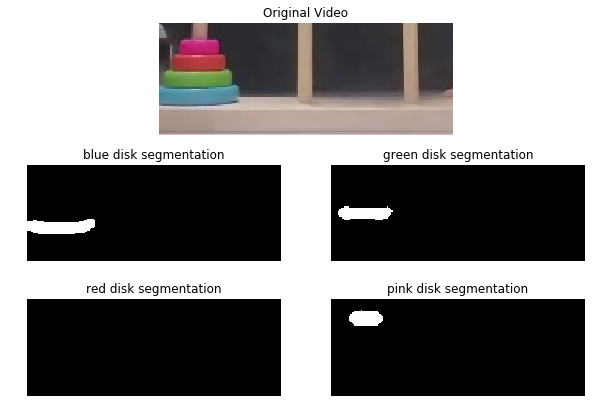

In [341]:
def putText( im, xy, text, color=(255,255,255), scale=.7 ):
    font                   = cv2.FONT_HERSHEY_SIMPLEX
    bottomLeftCornerOfText = xy
    fontScale              = scale
    fontColor              = color
    lineType               = 2
    cv2.putText(im,text, bottomLeftCornerOfText, font, fontScale, fontColor, lineType)
    
cap = cv2.VideoCapture('data/mark_test_4disk_wooden.mp4')
cap.set(2,0)

fig = plt.figure(figsize=(10,7))
gs = gridspec.GridSpec(3, 2, fig)
axs = []
axs.append(plt.subplot(gs[0, :]))
axs.append(plt.subplot(gs[1, 0]))
axs.append(plt.subplot(gs[1, 1]))
axs.append(plt.subplot(gs[2, 0]))
axs.append(plt.subplot(gs[2, 1]))

total_frames = int(cap.get(7))
pbar = ProgressBar()
for i in pbar(range(total_frames)):
    for j in range(7):
        ret, frame = cap.read()
    if ret == False:
        continue
        
    # crop
    frame = frame[330:410, 140:350, :]
    
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frame_hsa = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    frame_hue = frame_hsa[:,:,0]
    frame_sat = frame_hsa[:,:,1]

    ax = axs[0]
    ax.imshow(frame_rgb);
    formatAxes(ax, title='Original Video')
    ax.axison = False

    frame_disk_seg = []
    for k in range(4):
        t_seg = np.bitwise_and( np.bitwise_and(frame_hue>color_bins[k][1], frame_hue<color_bins[k][2]), frame_sat>sat[k])
        t_seg = np.array( t_seg, dtype=np.uint8)
        frame_disk_seg.append( cv2.medianBlur(t_seg, 11) )
        
        ax = axs[k+1]
        ax.imshow(frame_disk_seg[k], cmap='gray');
        formatAxes(ax, title=f'{color_bins[k][0]} disk segmentation')
        ax.axison = False
    # break
    fig.savefig(f'./data/mark_test_segmented/{i}.jpg')

<video style='text-align: center' src='./segmented_video_mark.mp4' controls></video>